<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
113/113 [==============================] - 1s 3ms/step - loss: 0.3154
Epoch 2/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2598
Epoch 3/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2463
Epoch 4/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2378
Epoch 5/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2310
Epoch 6/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2275
Epoch 7/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2210
Epoch 8/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2198
Epoch 9/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2138
Epoch 10/10
29/29 [==============================] - 0s 2ms/step

Matriz de Confusión:
      No  Yes
No   773   34
Yes   68   30


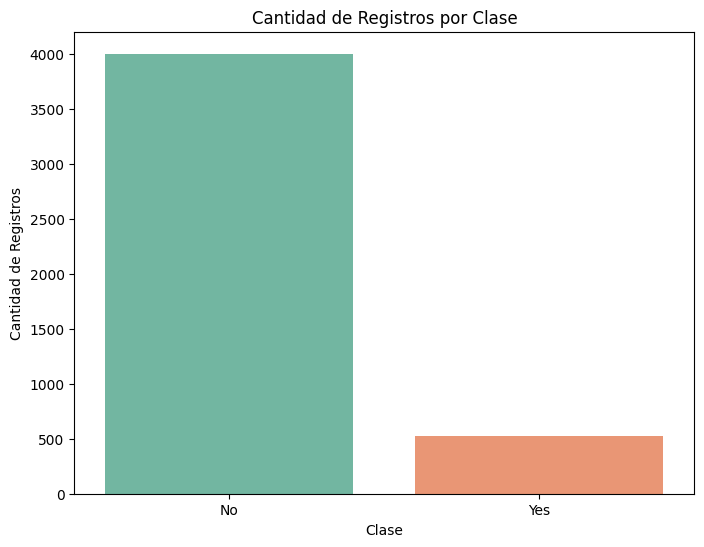

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.47      0.31      0.37        98

    accuracy                           0.89       905
   macro avg       0.69      0.63      0.65       905
weighted avg       0.87      0.89      0.88       905



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report


# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')


# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)







# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)


# Crear un gráfico de barras para mostrar la cantidad de registros por clase
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas personalizadas para las clases
plt.show()



report = classification_report(y_test, y_pred, labels = [0,1])
print(report)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 3.5894
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 1.8242
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 2.6374
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 1.9695
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 1.3768
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 1.8370
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 1.1896
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 1.2417
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.9724
Epoch 10/10
29/29 [==============================] - 0s 2ms/step

Matriz de Confusión:
      No  Yes
No   587  220
Yes   44   54


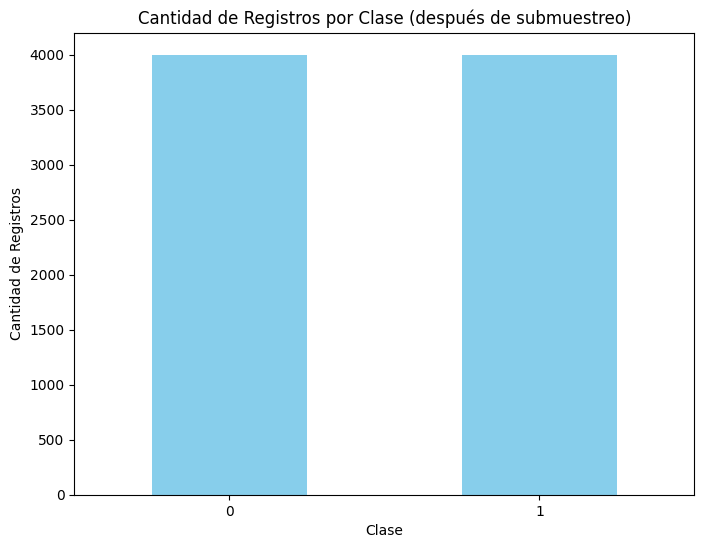

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       807
           1       0.20      0.55      0.29        98

    accuracy                           0.71       905
   macro avg       0.56      0.64      0.55       905
weighted avg       0.85      0.71      0.76       905



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')

# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Aplicar oversampling utilizando RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)




# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo con los datos submuestreados
model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

# Crear un gráfico de barras para mostrar la cantidad de registros por clase después de submuestreo
plt.figure(figsize=(8, 6))
pd.Series(y_resampled).value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase (después de submuestreo)')
plt.xticks(rotation=0)
plt.show()

report = classification_report(y_test, y_pred, labels = [0,1])
print(report)
